In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import investpy

source: [www.codingfinance.com][id]

[id]:https://www.codingfinance.com/post/2018-04-05-portfolio-returns-py/ "Website access"

* * *

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

In [207]:
start = dt.datetime(2013, 1, 1) #(1980, 1, 1)
end = dt.datetime(2020, 10, 1)

tickers = ['AAPL', 'AMZN', 'MSFT', 'GOOGL','META']
stocks = web.DataReader(tickers,
                        'yahoo', start, end)['Adj Close']

stocks

Symbols,AAPL,AMZN,MSFT,GOOGL,META
Date,,,,,
2013-01-02,16.890797,12.865500,22.838871,18.099348,28.000000
2013-01-03,16.677595,12.924000,22.532923,18.109859,27.770000
2013-01-04,16.213051,12.957500,22.111198,18.467718,28.760000
2013-01-07,16.117680,13.423000,22.069857,18.387136,29.420000
2013-01-08,16.161058,13.319000,21.954084,18.350851,29.059999
...,...,...,...,...,...
2020-09-25,110.940796,154.756500,204.220032,71.953003,254.820007
2020-09-28,113.588821,158.702499,205.811966,72.932999,256.820007
2020-09-29,112.729187,157.244003,203.669708,73.301003,261.790009


In [199]:
#symbols = ['VOO','VEA', 'VB', 'VWO','BND']
symbols = ['META']

In [200]:
start = dt.datetime(2014,1,1)
end = dt.datetime.now()

price_data = web.get_data_yahoo(symbols)
print(price_data)
price_data = price_data['Adj Close']
df=price_data.copy()
price_data

Attributes   Adj Close       Close        High         Low        Open  \
Symbols           META        META        META        META        META   
Date                                                                     
2017-09-27  167.679993  167.679993  168.339996  165.570007  165.899994   
2017-09-28  168.729996  168.729996  169.070007  167.160004  167.940002   
2017-09-29  170.869995  170.869995  171.660004  168.809998  168.830002   
2017-10-02  169.470001  169.470001  171.869995  168.750000  171.389999   
2017-10-03  169.960007  169.960007  170.729996  169.199997  169.300003   
...                ...         ...         ...         ...         ...   
2022-09-20  146.089996  146.089996  148.839996  145.220001  145.779999   
2022-09-21  142.119995  142.119995  149.600006  142.000000  146.389999   
2022-09-22  142.820007  142.820007  144.580002  140.869995  141.550003   
2022-09-23  140.410004  140.410004  142.619995  138.889999  141.419998   
2022-09-26  137.080002  137.080002  14

Symbols,META
Date,
2017-09-27,167.679993
2017-09-28,168.729996
2017-09-29,170.869995
2017-10-02,169.470001
2017-10-03,169.960007
...,...
2022-09-20,146.089996
2022-09-21,142.119995
2022-09-22,142.820007


# Moving average
- https://blog.quantinsti.com/build-technical-indicators-in-python/
- https://dev.to/qviper/python-for-stock-market-analysis-exploring-technical-trend-indicators-a71https://dev.to/qviper/python-for-stock-market-analysis-exploring-technical-trend-indicators-a71


In [137]:
# Linear Moving average
def mov_av(ndays,df,ma_type,nstocks):
    print(len(df.columns))
    if ma_type=='sma': # Simple Moving Average
        df.rolling(window=ndays).mean()
    elif ma_type=='ema': # Exponential Moving Average
        df.ewm(span=ndays, min_periods = ndays - 1, adjust=False).mean()
    elif ma_type=='wma': # Weighted Moving Average
        #df.rolling(window = ndays ).apply(lambda x: np.sum(weights*x)) #
        df.rolling(window=ndays, min_periods=ndays).apply(lambda x: np.average(x, weights=np.arange(1, ndays+1,1)))
    
    for i in df.columns:
        df['%s_%s_%sD' % (i,ma_type,ndays)]=df[i]
        print(len(df.columns))
    
    # Only keep the moverin average elements
    dg=df.iloc[:,nstocks:]
    
    return dg

In [139]:
mov_av(5,df,'sma',len(symbols))

10
11
12
13
14
15
16
17
18
19
20


Symbols,VOO_ema_5D,VEA_ema_5D,VB_ema_5D,VWO_ema_5D,BND_ema_5D,VOO_sma_5D,VEA_sma_5D,VB_sma_5D,VWO_sma_5D,BND_sma_5D,VOO_ema_5D_sma_5D,VEA_ema_5D_sma_5D,VB_ema_5D_sma_5D,VWO_ema_5D_sma_5D,BND_ema_5D_sma_5D
Date,,,,,,,,,,,,,,,
2013-01-02,112.249001,26.886654,72.438385,34.827431,65.124466,112.249001,26.886654,72.438385,34.827431,65.124466,112.249001,26.886654,72.438385,34.827431,65.124466
2013-01-03,112.148193,26.616362,72.394836,34.620644,64.930435,112.148193,26.616362,72.394836,34.620644,64.930435,112.148193,26.616362,72.394836,34.620644,64.930435
2013-01-04,112.618713,26.766525,72.943413,34.681915,65.031319,112.618713,26.766525,72.943413,34.681915,65.031319,112.618713,26.766525,72.943413,34.681915,65.031319
2013-01-07,112.316200,26.631378,72.725723,34.383194,64.984787,112.316200,26.631378,72.725723,34.383194,64.984787,112.316200,26.631378,72.725723,34.383194,64.984787
2013-01-08,111.980148,26.488718,72.586395,34.099804,65.046852,111.980148,26.488718,72.586395,34.099804,65.046852,111.980148,26.488718,72.586395,34.099804,65.046852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-23,233.308533,39.634716,139.323166,42.638836,70.830582,233.308533,39.634716,139.323166,42.638836,70.830582,233.308533,39.634716,139.323166,42.638836,70.830582
2018-02-26,235.997452,39.948990,140.025299,43.041992,70.866203,235.997452,39.948990,140.025299,43.041992,70.866203,235.997452,39.948990,140.025299,43.041992,70.866203
2018-02-27,232.985123,39.337883,138.087448,41.885090,70.714882,232.985123,39.337883,138.087448,41.885090,70.714882,232.985123,39.337883,138.087448,41.885090,70.714882


In [151]:
arr = [1, 2, 3, 7, 9]
  
# Store cumulative sums of array in cum_sum array
cum_sum = np.cumsum(arr);
cum_sum

array([ 1,  3,  6, 13, 22])

# Return

In [6]:
# Program to calculate cumulative moving average
# using numpy
  
import numpy as np
  
arr = [1, 2, 3, 7, 9]
  
i = 1
# Initialize an empty list to store cumulative moving
# averages
moving_averages = []
  
# Store cumulative sums of array in cum_sum array
cum_sum = np.cumsum(arr);
  
# Loop through the array elements
while i <= len(arr):
  
    # Calculate the cumulative average by dividing
    # cumulative sum by number of elements till 
    # that position
    window_average = round(cum_sum[i-1] / i, 2)
      
    # Store the cumulative average of
    # current window in moving average list
    moving_averages.append(window_average)
      
    # Shift window to right by one position
    i += 1

print(cum_sum)
print(moving_averages)

[ 1  3  6 13 22]
[1.0, 1.5, 2.0, 3.25, 4.4]


In [178]:
# Linear Returns data
def Return(df,x,t_return):
    
    if t_return=='linear':
        print('linear')
        dg=df/df.shift(x)-1
        dg=dg[x:]
        dg.columns=[df.columns + '_linReturn']# Linear return
        dg[df.columns + '_CumlinReturn']=np.cumsum(dg[df.columns + '_linReturn']) # Cumulative linear return
    #pd.options.display.float_format = '{:.2%} %'.format  #'{:.2f} %'.format()
    #    dg.columns=['%s_lreturn_%sD' % (i,x)]
    #dg=dg[x:]
    elif t_return=='log':
        dg=np.log(df)-np.log(df.shift(x))
        dg=dg[x:]
        dg.columns=[df.columns + '_logReturn'] #Log return
        dg[df.columns + '_CumullogReturn']=np.cumsum(dg[df.columns + '_logReturn']) # Cumulative log return
    
    return dg            

In [183]:
Ret_val= Return(price_data,1,'linear')
Ret_val.tail()

linear


Symbols,FB_linReturn,FB_CumlinReturn
Date,,
2022-09-20,-0.013039,-0.723779
2022-09-21,-0.027175,-0.750954
2022-09-22,0.004926,-0.746029
2022-09-23,-0.016874,-0.762903
2022-09-26,-0.017093,-0.779996


In [148]:
Return=logReturn(price_data,1)
Return.head()

Symbols,VOO_logReturn,VEA_logReturn,VB_logReturn,VWO_logReturn,BND_logReturn
Date,,,,,
2013-01-03,-0.000898,-0.010104,-0.000601,-0.005955,-0.002984
2013-01-04,0.004187,0.005626,0.007549,0.001768,0.001553
2013-01-07,-0.002690,-0.005062,-0.002989,-0.008650,-0.000716
2013-01-08,-0.002997,-0.005371,-0.001918,-0.008276,0.000955
2013-01-09,0.002997,0.004807,0.004309,0.005823,-0.000358


# Weights

In [21]:
w = [0.1,0.2,0.25,0.25,0.2]
print(sum(w))

1.0


In [25]:
wts_table = pd.DataFrame({'symbol':symbols,
                          'wts':[0.25,0.25,0.2,0.2,0.1]})
print(wts_table.head())

  symbol   wts
0    VOO  0.25
1    VEA  0.25
2     VB  0.20
3    VWO  0.20
4    BND  0.10


In [23]:
# Weighted returns for each assets
weighted_returns=(Return * w)

# Total return of the portfolio
port_ret = weighted_returns.sum(axis=1)
# axis =1 only add the rows
port_ret

Date
2013-01-03   -0.004347
2013-01-04    0.004184
2013-01-07   -0.004334
2013-01-08   -0.003732
2013-01-09    0.003723
                ...   
2018-02-23    0.011386
2018-02-26    0.006435
2018-02-27   -0.015091
2018-02-28   -0.009193
2018-03-01   -0.004691
Length: 1299, dtype: float64

# Plot Figure

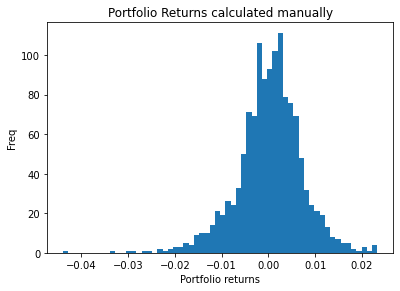

In [24]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(port_ret, bins = 60)
ax1.set_xlabel('Portfolio returns')
ax1.set_ylabel("Freq")
ax1.set_title("Portfolio Returns calculated manually")
plt.show(); 

In [ ]:
symbols = ["VEA", "VB", "VWO","BND"] #["AIRF", "BOUY", "AXAF"] #["VOO","VEA", "VB", "VWO","BND"]

for stocks in symbols:
    df = investpy.etfs.get_etf_historical_data(etf='Vanguard FTSE Emerging Markets',
                                               country='united states',
                                               from_date = '01/01/2013',
                                               to_date = '01/03/2022',
                                               as_json=False,
                                               order='ascending')
    price_data=pd.concate([price_data,df])
print(price_data.head())

In [ ]:
investpy.etfs.get_etf_historical_data(etf='US9220428588',
                                      country='united states',
                                      from_date = '01/01/2013',
                                      to_date = '01/03/2022')

In [ ]:
data = investpy.get_etf_historical_data(etf='BBVA Accion DJ Eurostoxx 50', country='spain', from_date='01/01/20000', to_date='01/01/2022')
data.head()

In [ ]:


import investpy
import pandas as pd

import random

from pprint import pprint



In [ ]:


# This function retrieves all the available equities indexed on es.Investing.com
available_equities = investpy.get_equities_list()
pprint(available_equities)



In [ ]:
#Data Source
#https://pypi.org/project/yfinance/
import yfinance as yf

In [ ]:
msft = yf.Tickers("msft aapl goog")
# get historical market data
hist = msft.history(period="max")
hist